In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [8]:
# load teh csv data to a pandas dataframe
df = pd.read_csv("/content/gBqE3R1cmOb0qyAv.csv")

In [9]:
df.shape

(5634, 21)

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churned
0,4950-BDEUX,Male,0,No,No,35,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,0
1,7993-NQLJE,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,0
2,7321-ZNSLA,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,...,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,0
3,4922-CVPDX,Female,0,Yes,No,26,Yes,No,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.7,0
4,2903-YYTBW,Male,0,Yes,Yes,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.55,44.55,0


In [11]:
pd.set_option("display.max_columns", None)

In [12]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churned
0,4950-BDEUX,Male,0,No,No,35,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.2,1701.65,0
1,7993-NQLJE,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,75.1,1151.55,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [14]:
df = df.drop(columns=["customerID"])

In [15]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'churned'],
      dtype='object')

In [16]:
print(df["gender"].unique())

['Male' 'Female']


In [17]:
print(df["SeniorCitizen"].unique())

[0 1]


In [18]:
numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)

gender ['Male' 'Female']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['No' 'Yes']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['No' 'Yes' 'No internet service']
--------------------------------------------------
DeviceProtection ['Yes' 'No' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['Yes' 'No' 'No internet 

In [19]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
churned             0
dtype: int64


In [20]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churned
819,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0
1999,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
2100,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
4710,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
5057,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
5294,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
5361,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,0
5608,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0


In [21]:
len(df[df["TotalCharges"]==" "])

8

In [22]:
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})

In [23]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   object 
 3   Dependents        5634 non-null   object 
 4   tenure            5634 non-null   int64  
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5634 non-null   object 


In [25]:
 print(df["churned"].value_counts())

churned
0    4139
1    1495
Name: count, dtype: int64


Insights:

Customer ID removed as it is not required for modelling
No mmissing values in the dataset
Missing values in the TotalCharges column were replaced with 0
Class imbalance identified in the target

In [26]:
df.shape

(5634, 20)

In [27]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'churned'],
      dtype='object')

In [28]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churned
0,Male,0,No,No,35,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.2,1701.65,0
1,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,75.1,1151.55,0


In [29]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,churned
count,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000
mean,0.163294,32.485091,64.929961,2299.334682,0.265353
std,0.369667,24.568744,30.138105,2279.204278,0.441560
min,0.000000,0.000000,18.400000,0.000000,0.000000
25%,0.000000,9.000000,35.662500,402.975000,0.000000
50%,0.000000,29.000000,70.500000,1394.925000,0.000000
75%,0.000000,55.000000,90.000000,3835.825000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [30]:
def plot_histogram(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()

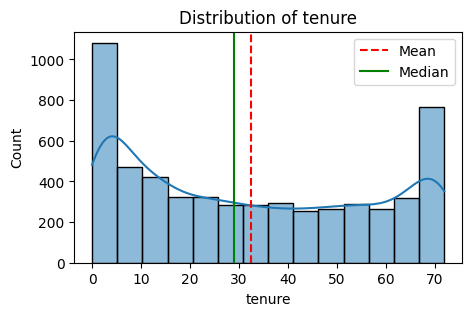

In [31]:
plot_histogram(df, "tenure")

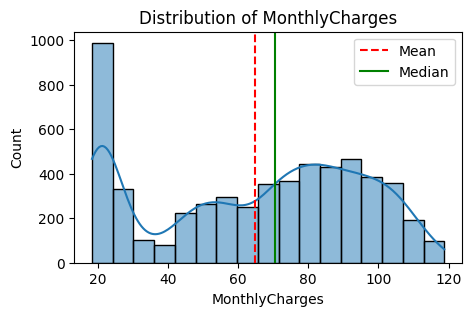

In [32]:
plot_histogram(df, "MonthlyCharges")

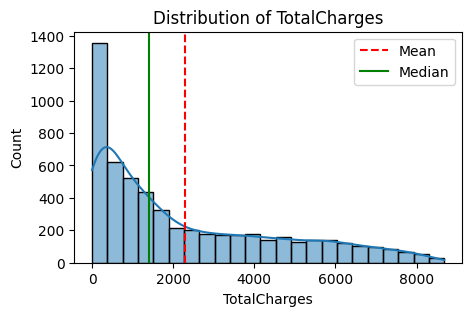

In [33]:
plot_histogram(df, "TotalCharges")

In [34]:
def plot_boxplot(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show

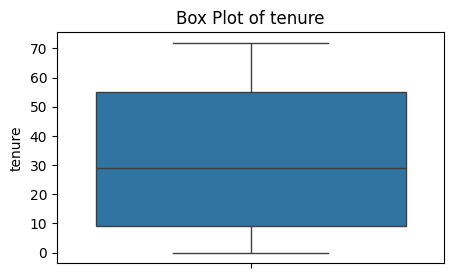

In [35]:
plot_boxplot(df, "tenure")

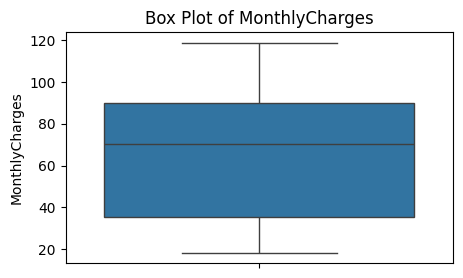

In [36]:
plot_boxplot(df, "MonthlyCharges")

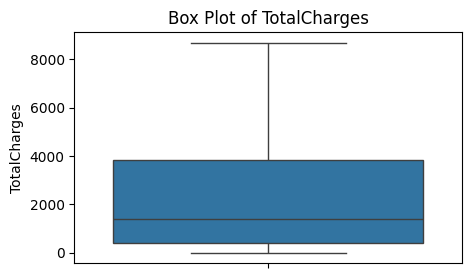

In [37]:
plot_boxplot(df, "TotalCharges")

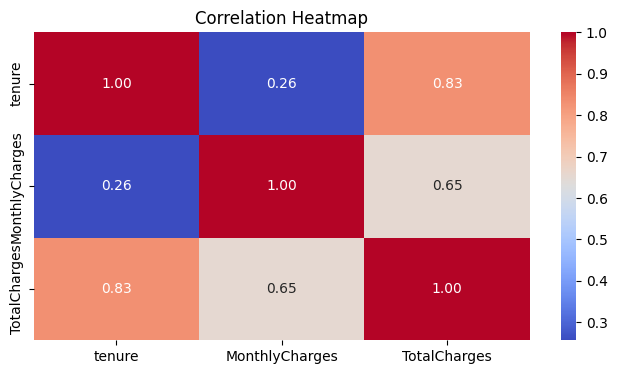

In [38]:
plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [39]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'churned'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   object 
 3   Dependents        5634 non-null   object 
 4   tenure            5634 non-null   int64  
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5634 non-null   object 


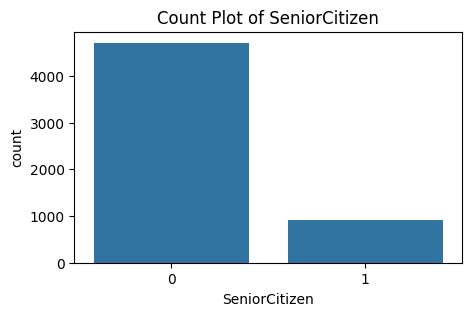

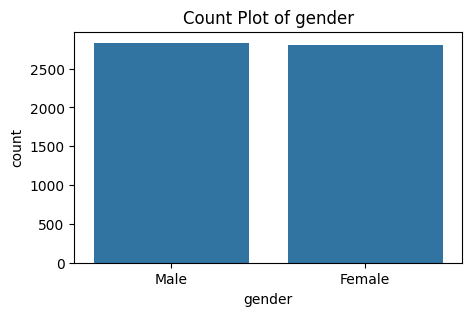

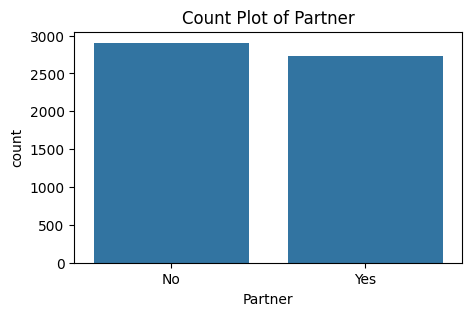

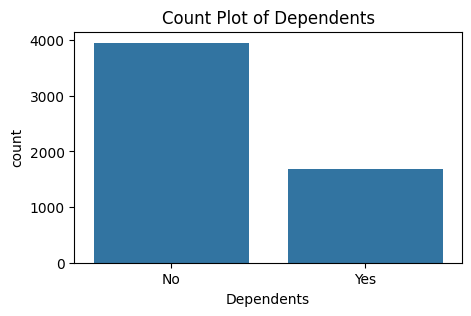

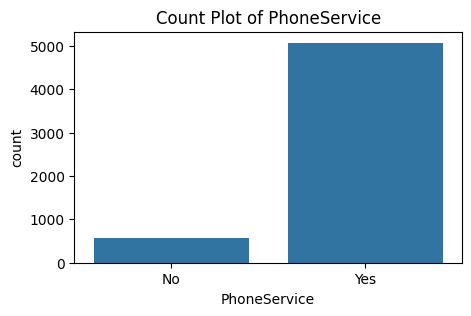

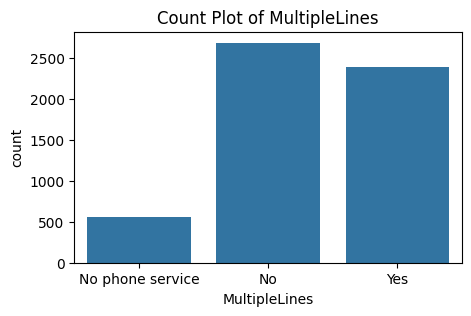

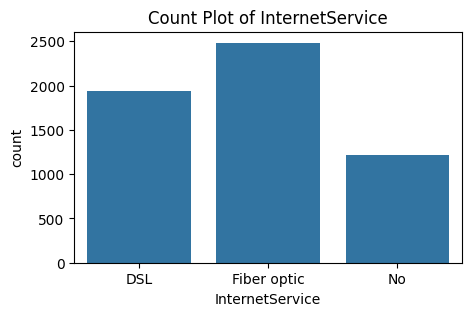

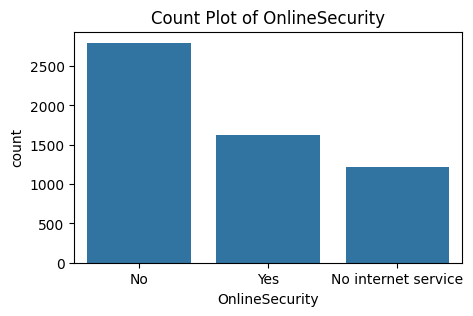

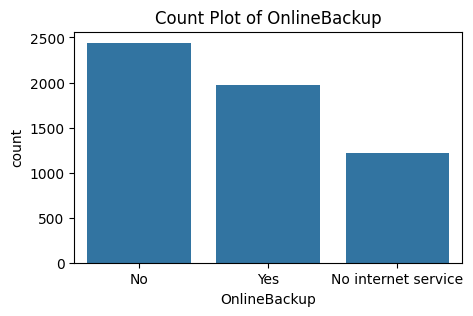

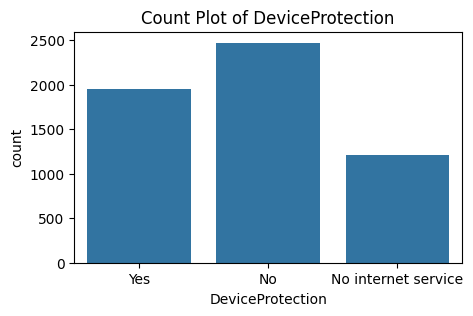

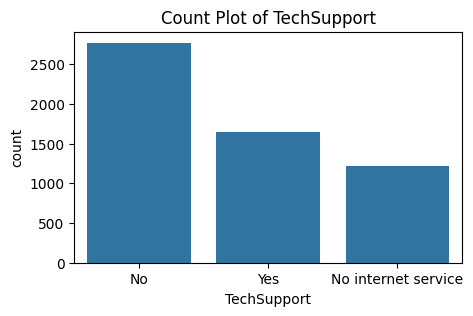

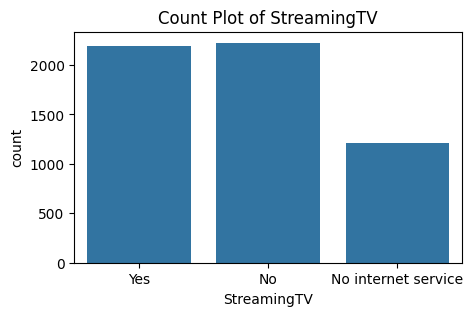

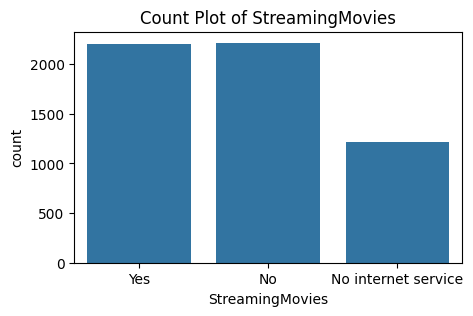

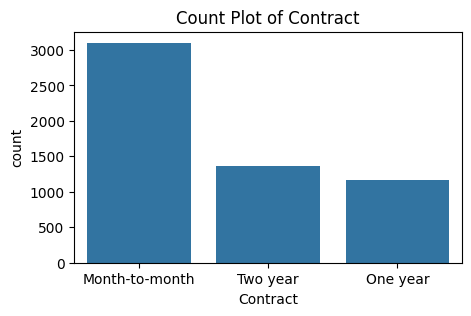

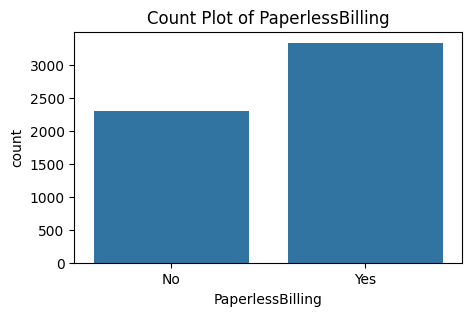

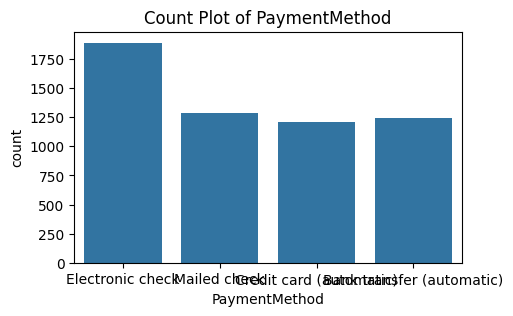

In [41]:
object_cols = df.select_dtypes(include="object").columns.to_list()

object_cols = ["SeniorCitizen"] + object_cols

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

Data Preprocessing


In [42]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churned
0,Male,0,No,No,35,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,0
1,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,0
2,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,0


In [43]:
df["churned"] = df["churned"].replace({"Yes": 1, "No": 0})

In [44]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churned
0,Male,0,No,No,35,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,0
1,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,0
2,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,0


In [45]:
print(df["churned"].value_counts())

churned
0    4139
1    1495
Name: count, dtype: int64


In [46]:
object_columns = df.select_dtypes(include="object").columns

In [47]:
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [48]:
# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder


# save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

In [49]:
encoders


{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [50]:

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churned
0,1,0,0,0,35,0,1,0,0,0,2,0,2,2,0,0,2,49.20,1701.65,0
1,1,0,1,1,15,1,0,1,2,0,0,0,0,0,0,0,3,75.10,1151.55,0
2,1,0,1,1,13,0,1,0,2,2,0,2,0,0,2,0,3,40.55,590.35,0
3,0,0,1,0,26,1,0,0,0,2,2,0,2,2,2,1,1,73.50,1905.70,0
4,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,2,44.55,44.55,0


In [51]:
# splitting the features and target
X = df.drop(columns=["churned"])
y = df["churned"]

In [52]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
print(y_train.shape)

(4507,)


In [54]:
print(y_train.value_counts())

churned
0    3300
1    1207
Name: count, dtype: int64


Synthetic Minority Oversampling TEchnique (SMOTE)


In [55]:
smote = SMOTE(random_state=42)


In [56]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [57]:
print(y_train_smote.shape)

(6600,)


In [58]:
print(y_train_smote.value_counts())

churned
0    3300
1    3300
Name: count, dtype: int64


. Model Training

Training with default hyperparameters


In [59]:
# dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [60]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.79
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.84
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.84
----------------------------------------------------------------------


In [61]:
cv_scores

{'Decision Tree': array([0.68863636, 0.72575758, 0.84090909, 0.84318182, 0.83484848]),
 'Random Forest': array([0.73939394, 0.76818182, 0.89469697, 0.90681818, 0.87424242]),
 'XGBoost': array([0.7219697 , 0.76893939, 0.89318182, 0.91212121, 0.88863636])}

In [62]:
rfc = RandomForestClassifier(random_state=42)

In [63]:
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [64]:
print(y_test.value_counts())

churned
0    839
1    288
Name: count, dtype: int64


In [65]:
# evaluate on test data
y_test_pred = rfc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("Confsuion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy Score:
 0.7843833185448092
Confsuion Matrix:
 [[717 122]
 [121 167]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       839
           1       0.58      0.58      0.58       288

    accuracy                           0.78      1127
   macro avg       0.72      0.72      0.72      1127
weighted avg       0.78      0.78      0.78      1127



In [66]:
# save the trained model as a pickle file
model_data = {"model": rfc, "features_names": X.columns.tolist()}


with open("customer_churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

In [67]:
# load teh saved model and the feature names

with open("customer_churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

In [68]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [69]:
print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [70]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}


input_data_df = pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)


# encode categorical featires using teh saved encoders
for column, encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])

# make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")

[0]
Prediction: No Churn
Prediciton Probability: [[0.78 0.22]]


In [71]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [72]:
# Save the trained Random Forest model
with open("rfc_model.pkl", "wb") as f:
    pickle.dump(rfc, f)


In [73]:
# Predict churn probabilities on the test set
y_test_proba = rfc.predict_proba(X_test)[:, 1]  # Probability of churn class = 1

# Create a DataFrame to hold test data and predicted probabilities
churn_results = X_test.copy()
churn_results["Actual_Churn"] = y_test.values
churn_results["Churn_Probability"] = y_test_proba

# Optional: Reset index and save
churn_results.reset_index(drop=True, inplace=True)
churn_results.to_csv("churn_results.csv", index=False)


In [74]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rfc.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importances.to_csv("feature_importances.csv", index=False)


In [76]:
# from pyngrok import ngrok

# # 🔪 Kill all existing tunnels
# ngrok.kill()


In [82]:
# Install required libraries (if not already installed)
!pip install dash dash-bootstrap-components pyngrok pandas joblib scikit-learn

# Imports
import dash
from dash import Dash, html, dcc, Input, Output, State, dash_table
import dash_bootstrap_components as dbc
from pyngrok import ngrok
import pandas as pd
import threading, io, base64
from sklearn.linear_model import LogisticRegression
import joblib
import numpy as np

# Train a dummy model and save it
X_dummy = np.random.rand(100, 3)
y_dummy = np.random.randint(0, 2, size=100)
model = LogisticRegression()
model.fit(X_dummy, y_dummy)
joblib.dump(model, "churn_model.joblib")

# Dash App Setup
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
app.title = "Churn Dashboard"

# Layout
app.layout = dbc.Container([
    html.H2("📈 Customer Churn Prediction Dashboard", className="text-center mt-3"),

    dcc.Upload(
        id='upload-data',
        children=html.Div(["📤 Drag & Drop or Click to Upload CSV"]),
        style={'width': '100%', 'height': '60px', 'lineHeight': '60px',
               'borderWidth': '1px', 'borderStyle': 'dashed',
               'borderRadius': '5px', 'textAlign': 'center',
               'margin': '10px'},
        multiple=False
    ),

    dbc.Row([
        dbc.Col(dcc.Graph(id='churn-graph'), md=6),
        dbc.Col(dcc.Graph(id='churn-pie'), md=6),
    ]),

    html.Hr(),
    html.H4("📋 All Customers"),
    html.Div(id='all-customers'),

    html.Hr(),
    html.Div([
        html.H5("🎯 High Risk Customers (A)", className="text-white bg-danger p-2"),
        html.Div(id='high-risk'),
    ]),
    html.Div([
        html.H5("⚠️ Medium Risk Customers (B)", className="text-dark bg-warning p-2"),
        html.Div(id='medium-risk'),
    ]),
    html.Div([
        html.H5("✅ Low Risk Customers (C)", className="text-white bg-success p-2"),
        html.Div(id='low-risk'),
    ])
], fluid=True)


# Data parsing and prediction function
def parse_contents(contents, filename):
    content_type, content_string = contents.split(',')
    decoded = base64.b64decode(content_string)
    try:
        df = pd.read_csv(io.StringIO(decoded.decode('utf-8')))
    except Exception as e:
        return html.Div(["❌ Error reading file: " + str(e)]), {}, {}, {}, {}, {}

    try:
        model = joblib.load("churn_model.joblib")
        df["TotalCharges"] = df["TotalCharges"].replace({",": ""}, regex=True)
        df[["tenure", "MonthlyCharges", "TotalCharges"]] = df[["tenure", "MonthlyCharges", "TotalCharges"]].apply(pd.to_numeric, errors='coerce')
        df = df.dropna(subset=["tenure", "MonthlyCharges", "TotalCharges"])

        features = df[["tenure", "MonthlyCharges", "TotalCharges"]]
        df["Churn Probability"] = model.predict_proba(features)[:, 1]

        def classify_risk(prob):
            if prob >= 0.7:
                return 'High (A)'
            elif prob >= 0.3:
                return 'Medium (B)'
            else:
                return 'Low (C)'

        df["Churn Risk"] = df["Churn Probability"].apply(classify_risk)

    except Exception as e:
        return html.Div(["❌ Model Prediction Error: " + str(e)]), {}, {}, {}, {}, {}

    # Bar Graph
    bar_fig = {
        "data": [{
            "x": df.index,
            "y": df["Churn Probability"],
            "type": "bar",
            "name": "Churn Probability",
            "marker": {"color": df["Churn Probability"], "colorscale": "Bluered"}
        }],
        "layout": {"title": "Predicted Churn Probability", "xaxis": {"title": "Customer Index"}, "yaxis": {"title": "Probability"}}
    }

    # Pie Chart
    risk_counts = df["Churn Risk"].value_counts()
    pie_fig = {
        "data": [{
            "values": risk_counts.values,
            "labels": risk_counts.index,
            "type": "pie",
            "hole": .5,
            "marker": {"colors": ["#dc3545", "#ffc107", "#28a745"]}
        }],
        "layout": {"title": "Churn Risk Distribution"}
    }

    def generate_table(dataframe):
        return dash_table.DataTable(
            data=dataframe.to_dict('records'),
            columns=[{"name": i, "id": i} for i in dataframe.columns],
            page_size=10,
            style_table={'overflowX': 'auto'},
            style_cell={'textAlign': 'left', 'padding': '5px'},
            style_header={'backgroundColor': '#f8f9fa', 'fontWeight': 'bold'}
        )

    all_table = generate_table(df)
    high_table = generate_table(df[df["Churn Risk"] == "High (A)"])
    medium_table = generate_table(df[df["Churn Risk"] == "Medium (B)"])
    low_table = generate_table(df[df["Churn Risk"] == "Low (C)"])

    return all_table, bar_fig, pie_fig, high_table, medium_table, low_table


# Dash Callbacks
@app.callback(
    [Output('all-customers', 'children'),
     Output('churn-graph', 'figure'),
     Output('churn-pie', 'figure'),
     Output('high-risk', 'children'),
     Output('medium-risk', 'children'),
     Output('low-risk', 'children')],
    [Input('upload-data', 'contents')],
    [State('upload-data', 'filename')]
)
def update_output(contents, filename):
    if contents is None:
        return dash.no_update, dash.no_update, dash.no_update, dash.no_update, dash.no_update, dash.no_update
    return parse_contents(contents, filename)


# Start the Dash app using ngrok
def run_dash():
    app.run(host='0.0.0.0', port=8050)

ngrok.kill()
ngrok.set_auth_token("2yUEW9viYUv3E3okQYHoP9N7pLi_3JduMpjNdk7FBYyUw69L1")  # Replace with your ngrok auth token
public_url = ngrok.connect(8050)
print("🚀 Open your app here:", public_url)

thread = threading.Thread(target=run_dash)
thread.start()




🚀 Open your app here: NgrokTunnel: "https://7fdf-35-186-176-172.ngrok-free.app" -> "http://localhost:8050"
